<h1>Chapter 7 - Advanced Text Generation Techniques and Tools</h1>
<i>Going beyond prompt engineering.</i>

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961"><img src="https://img.shields.io/badge/Buy%20the%20Book!-grey?logo=amazon"></a>
<a href="https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/"><img src="https://img.shields.io/badge/O'Reilly-white.svg?logo=data:image/svg%2bxml;base64,PHN2ZyB3aWR0aD0iMzQiIGhlaWdodD0iMjciIHZpZXdCb3g9IjAgMCAzNCAyNyIgZmlsbD0ibm9uZSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj4KPGNpcmNsZSBjeD0iMTMiIGN5PSIxNCIgcj0iMTEiIHN0cm9rZT0iI0Q0MDEwMSIgc3Ryb2tlLXdpZHRoPSI0Ii8+CjxjaXJjbGUgY3g9IjMwLjUiIGN5PSIzLjUiIHI9IjMuNSIgZmlsbD0iI0Q0MDEwMSIvPgo8L3N2Zz4K"></a>
<a href="https://github.com/HandsOnLLM/Hands-On-Large-Language-Models"><img src="https://img.shields.io/badge/GitHub%20Repository-black?logo=github"></a>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter07/Chapter%207%20-%20Advanced%20Text%20Generation%20Techniques%20and%20Tools.ipynb)

---

This notebook is for Chapter 7 of the [Hands-On Large Language Models](https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961) book by [Jay Alammar](https://www.linkedin.com/in/jalammar) and [Maarten Grootendorst](https://www.linkedin.com/in/mgrootendorst/).

---

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961">
<img src="https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/images/book_cover.png" width="350"/></a>

### [OPTIONAL] - Installing Packages on <img src="https://colab.google/static/images/icons/colab.png" width=100>

If you are viewing this notebook on Google Colab (or any other cloud vendor), you need to **uncomment and run** the following codeblock to install the dependencies for this chapter:

---

💡 **NOTE**: We will want to use a GPU to run the examples in this notebook. In Google Colab, go to
**Runtime > Change runtime type > Hardware accelerator > GPU > GPU type > T4**.

---


In [ ]:
#%%capture
#!pip install langchain>=0.1.17 transformers>=4.40.1 datasets>=2.18.0 accelerate>=0.27.2 sentence-transformers>=2.5.1 duckduckgo-search>=5.2.2 langchain_community

'CMAKE_ARGS' is not recognized as an internal or external command,
operable program or batch file.


Follow this to install llama-cpp-python on windows WITH CUDA: https://python.langchain.com/docs/integrations/llms/llamacpp/<br>
Look at the "Installation with Windows" section. See how you need to install cmake and some other stuff from Visual Studio Installer.<br>
CMake can be downloaded and installed here: https://cmake.org/download/ Make sure you tick the **Add CMake to the system PATH for the current user.** option. Otherwise, follow how to add environment variables below.<br>
You will also need to install NVIDIA CUDA developer toolkit **get version 12.5, not 13.0 (unless u check and llama-cpp-python supports it)**.<br>

**If you have installed CMake from the Visual Studio Installer:**<br>
The issue is that Visual Studio keeps these tools within its own environment and doesn't automatically add them to the system's main PATH variable. This is done to prevent conflicts with other versions of tools you might have installed separately.

This means cmake.exe is on your computer, but standard terminals like PowerShell or Command Prompt don't know where to look for it.


**Manually Add Visual Studio's CMake to the PATH**<br>
You need to find where Visual Studio installed CMake and add that location to your system `PATH`.

The path is usually something like: C:\Program Files\Microsoft Visual Studio\<Your_Version>\<Your_Edition>\Common7\IDE\CommonExtensions\Microsoft\CMake\CMake\bin

For example, for Visual Studio 2022 Community Edition, it would be: C:\Program Files\Microsoft Visual Studio\2022\Community\Common7\IDE\CommonExtensions\Microsoft\CMake\CMake\bin

**Add this path to your Environment Variables:**
* Press the Windows key, type env, and select **"Edit the system environment variables"**.
* In the System Properties window that opens, click the **"Environment Variables..."** button.
* In the "System variables" section at the bottom, find and select the Path variable, then click **"Edit..."**.
* Click **"New"** and paste the path you copied (C:\Program Files\CMake\bin).
* Click **OK** on all the windows to save the changes.<br>

**IMPORTANT:** You must close and reopen your VS Code terminal for the changes to take effect. After reopening it, try running `cmake --version` again.


**Next, make sure to install "Desktop Development with C++" from Visual Studio Installer.**

**RESTART YOUR COMPUTER (especially for the NVIDIA CUDA Toolkit to take effect).**

Clone git repository recursively to get llama.cpp submodule as well
`git clone --recursive -j8 https://github.com/abetlen/llama-cpp-python.git`

Open up a command Prompt (use your virtual environment's powershell) and set the following environment variables.
<br>`set FORCE_CMAKE=1`

Compiling and installing<br>
Now you can **cd into the llama-cpp-python directory** and install the package

`python -m pip install -e .`

IMPORTANT: If you have already installed a cpu only version of the package, you need to reinstall it from scratch: consider the following command:

`pip install llama-cpp-python -C cmake.args="-DGGML_CUDA=on" --force-reinstall --no-cache-dir`

### It takes 30 minutes or so. Restart the Kernel when you are done.

In [ ]:
#!$env:CMAKE_ARGS="-DGGML_CUDA=on"
#!pip install llama-cpp-python --no-cache-dir --force-reinstall --upgrade

# Loading an LLM

In [4]:
#!wget https://huggingface.co/microsoft/Phi-3-mini-4k-instruct-gguf/resolve/main/Phi-3-mini-4k-instruct-fp16.gguf

# If this command does not work for you, you can use the link directly to download the model
# https://huggingface.co/microsoft/Phi-3-mini-4k-instruct-gguf/resolve/main/Phi-3-mini-4k-instruct-fp16.gguf

3. Post-Installation Runtime Error
Problem: FileNotFoundError: Could not find module '...llama.dll' (or one of its dependencies)
After a successful installation, you might get this error when trying to import or use LlamaCpp in Python.

* Cause: The llama.dll file was built correctly, but the Python runtime cannot find its required NVIDIA dependencies (e.g., cudart64_*.dll).
* Solution: Add the CUDA Toolkit's bin directory to your system's PATH environment variable.


**How to Add CUDA to the System PATH:**
1. Find your CUDA bin folder. The default path is usually: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v13.0\bin
2. Press the Windows key, type env, and select "Edit the system environment variables".
3. Click the "Environment Variables..." button.
4. In the "System variables" section, select Path and click "Edit...".
5. Click "New" and paste the CUDA bin path.
6. Click OK on all windows to save.
7. Crucially, you must completely restart VS Code for the changes to take effect in the terminal and Jupyter Notebook kernel.

In [1]:
from langchain_community.llms import LlamaCpp

# Make sure the model path is correct for your system!
llm = LlamaCpp(
    model_path="Phi-3-mini-4k-instruct-fp16.gguf",
    n_gpu_layers=-1,
    max_tokens=500,
    n_ctx=2048,
    seed=42,
    verbose=False
)

llama_context: n_batch is less than GGML_KQ_MASK_PAD - increasing to 64
llama_context: n_ctx_per_seq (2048) < n_ctx_train (4096) -- the full capacity of the model will not be utilized


In [45]:
llm.invoke("Hi! My name is Maarten. What is 1 + 1?")

''

### Chains

In [2]:
from langchain import PromptTemplate

# Create a prompt template with the "input_prompt" variable
template = """<|user|>
{input_prompt}<|end|>
<|assistant|>"""
prompt = PromptTemplate(
    template=template,
    input_variables=["input_prompt"]
)

In [3]:
basic_chain = prompt | llm

In [5]:
# Use the chain
basic_chain.invoke(
    {
        "input_prompt": "Hi! My name is Maarten. What is 1 + 1?",
    }
)

' Hello Maarten! The answer to 1 + 1 is 2.'

### Multiple Chains

## Original Notebook uses LLMChain(), which is deprecated. 
## Below, I, Kelvin, implemented using Runnables. More info here: https://python.langchain.com/docs/versions/migrating_chains/
### SEE https://python.langchain.com/docs/concepts/runnables/

Input and output types
Every Runnable is characterized by an input and output type. <br>These input and output types can be any Python object, and are defined by the Runnable itself.

Runnable methods that result in the execution of the Runnable (e.g., invoke, batch, stream, astream_events) work with these input and output types.

invoke: Accepts an input and returns an output.
batch: Accepts a list of inputs and returns a list of outputs.
stream: Accepts an input and returns a generator that yields outputs.<br>
The input type and output type vary by component:<br>
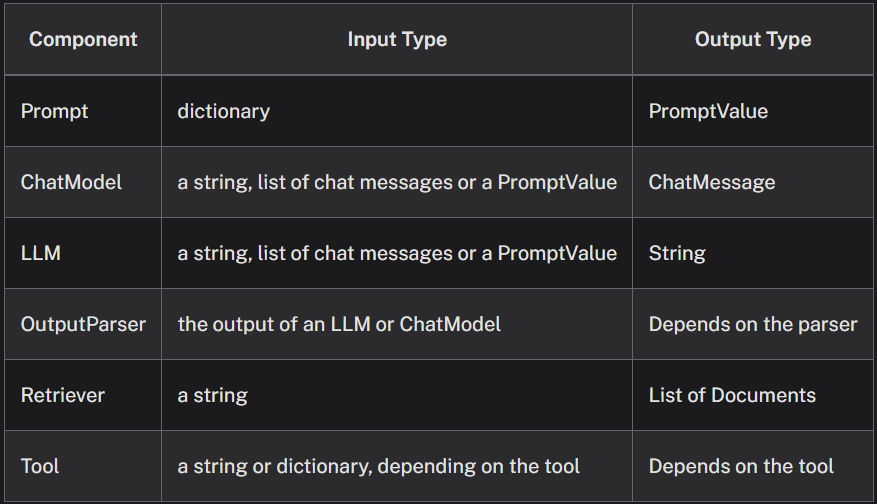

| operator pass the output of a Runnable to the next Runnable as input.<br>
If next Runnable is a dictionary, the inputs will be passed into each element and ran concurrently (https://python.langchain.com/api_reference/core/runnables/langchain_core.runnables.base.Runnable.html).

In [4]:
from langchain_core.runnables import RunnablePassthrough
template = """<|user|>
Create a title for a story about {summary}. Only return the title.<|end|>
<|assistant|>"""
# every single component here is a Runnable.
title_prompt = PromptTemplate(template=template, input_variables=["summary"]) # takes in a dictionary, outputs a PromptValue
title = title_prompt | llm # takes in a string, list of chat messages or a PromptValue and outputs a string
title_with_assign = RunnablePassthrough().assign(title=title) # dict packaging of input and output, see https://python.langchain.com/docs/versions/migrating_chains/llm_chain/
title_with_assign.invoke({"summary": "how to raise babies"}) # outputs dictionary with the input and output key and values

{'summary': 'how to raise babies',
 'title': ' "Nurturing Newborns: A Comprehensive Guide to Raising Happy, Healthy Babies"'}

In [5]:
template = """<|user|>
Describe the main character of a story about {summary} with the title {title}. Use only two sentences.<|end|>
<|assistant|>"""
character_prompt = PromptTemplate(
    template=template, input_variables=["summary", "title"]
)
character = character_prompt | llm
character_with_assign = RunnablePassthrough().assign(character=character)
chain = title_with_assign | character_with_assign
chain.invoke({"summary": "how to raise babies"})

{'summary': 'how to raise babies',
 'title': ' "Nurturing the Future: A Guide to Raising Healthy and Happy Babies"',
 'character': ' The main character of "Nurturing the Future: A Guide to Raising Healthy and Happy Babies" is a compassionate, knowledgeable, and patient parent who deeply cares about providing their child with love, guidance, and nourishment from infancy. They are dedicated to understanding the needs of their baby and consistently adapts their approach to ensure optimal physical, emotional, and cognitive development.'}

In [8]:
template = """<|user|>
Create a story about {summary} with the title {title}. The main charachter is: {character}. Only return the story and it cannot be longer than one paragraph<|end|>
<|assistant|>"""
story_prompt = PromptTemplate(
    template=template, input_variables=["summary", "title", "character"]
)
story = story_prompt | llm # no need assign here if we just want the story output. yes assign if u want dictionary.
story_with_assign = RunnablePassthrough().assign(story=story, length_of_title=lambda x: len(x["title"]))

In [ ]:
final = RunnablePassthrough().assign(length_of_story=lambda x: len(x["story"]))
chain = title_with_assign | character_with_assign | story_with_assign | final
chain.invoke({"summary": "how to raise babies"})

{'summary': 'a girl that lost her mother',
 'title': ' "The Echoes of Loss: A Girl\'s Journey Through Grief"',
 'character': ' The main character, Emily, is a resilient and introspective young girl who struggles to cope with the sudden loss of her mother. As she navigates through grief, she embarks on a transformative journey of self-discovery and healing, learning to find solace in cherished memories while forging new connections that help her navigate life without her beloved parent.',
 'story': ' "The Echoes of Loss: A Girl\'s Journey Through Grief" chronicles the poignant tale of Emily, a resilient and introspective young girl grappling with the sudden passing of her mother. Plunged into an abyss of grief, Emily finds herself navigating through emotional turmoil as she clings to cherished memories that serve as bittersweet reminders of happier times. Her journey is one marked by self-discovery and healing; it sees her forging new connections with friends who offer solace while grad

Checkout RunnablePassthrough documentation here: https://python.langchain.com/api_reference/core/runnables/langchain_core.runnables.passthrough.RunnablePassthrough.html<br>
You can even use lambda functions in the assign() to customize the values using the inputs from the previous chain.

Above, every time we execute part of the chain, we pack the input and output into a dictionary using RunnablePassthrough().assign() and output this dictionary. Then we passed this dictionary into the next chain as input.<br><br>
Another way is to define dictionaries and chain them either with `| RunnablePassthrough()`s or using `RunnableSequence`.<br><br>
Note we need the `| RunnablePassthrough()` after each chain as the outputs after each chain is just a plain ol' dictionary. Adding the `| RunnablePassthrough()` turns it into a Runnable.<br>From https://python.langchain.com/api_reference/core/runnables/langchain_core.runnables.passthrough.RunnablePassthrough.html:<br> _"Runnable to passthrough inputs unchanged or with additional keys. This Runnable behaves almost like the identity function, except that it can be configured to add additional keys to the output, if the input is a dict."_

Also note, after `invoke({"summary": "a girl that lost her mother"})`, the input dictionary (and all its components) is passed CONCURRENTLY into step1, since if Runnable is a dictionary, the inputs will be passed into each element of the dictionary and ran concurrently (https://python.langchain.com/api_reference/core/runnables/langchain_core.runnables.base.Runnable.html). <br>

In [10]:
from langchain_core.runnables import RunnableSequence
step1 = {
    "title": title,
    "summary": lambda x: x["summary"],
}
step2 = {
    
    "title": lambda x: x["title"],
    "character": character,
    "summary": lambda x: x["summary"],
}
step3 = {
    "summary": lambda x: x["summary"],
    "title": lambda x: x["title"],
    "character": lambda x: x["character"],
    "story": story,
    # "length of story": lambda x: len(x["story"]) # NOTE: you can only access items from previous step. You cannot access "story" here as step2 does not have the "story" key.
}
step4 = {
    "summary": lambda x: x["summary"],
    "title": lambda x: x["title"],
    "character": lambda x: x["character"],
    "story": lambda x: x["story"],
    "length of story": lambda x: len(x["story"])
}
# so step1, takes in input dictionary, produces a new dictionary with "title" and "summary" and turned into a Runnable through RunnablePassthrough().
# step2 takes step1's dictionary and repeats it. 
# same with step3. See how we re-ordered the dictionary elements here.
llm_chain = step1 | RunnablePassthrough() | step2 | RunnablePassthrough() | step3 | step4
print('without RunnableSequence:')
print(llm_chain.invoke({"summary": "a girl that lost her mother"}))
llm_chain = RunnableSequence(step1, step2, step3,step4)
print('\n\nwith RunnableSequence:')
print(llm_chain.invoke({"summary": "a girl that lost her mother"}))

without RunnableSequence:
{'summary': 'a girl that lost her mother', 'title': ' "Whispers of a Mother\'s Love: A Tale of Loss and Resilience"', 'character': ' The protagonist, Lily, is a resilient and introspective young girl who struggles to cope with the sudden loss of her mother. Despite her grief, she finds solace in cherished memories and pursues personal growth as she navigates through the challenging journey of life without her guiding maternal figure.', 'story': " Whispers of a Mother's Love: A Tale of Loss and Resilience unfolds with the poignant tale of Lily, whose world was irrevocably altered by her mother’s untimely departure. Engulfed in an ocean of sorrow, she grapples to anchor herself amidst a stormy sea of grief; yet within this tempest of pain and longing lies the seedling of resilience. As days transform into weeks, Lily clings to the cherished whispers her mother left behind—the gentle hum of lullabies in the night, the scent of jasmine lingering on old letters, an

# Memory

In [11]:
# Let's give the LLM our name
basic_chain.invoke({"input_prompt": "Hi! My name is Maarten. What is 1 + 1?"})

' Hello Maarten! The answer to 1 + 1 is 2.'

In [12]:
# Next, we ask the LLM to reproduce the name
basic_chain.invoke({"input_prompt": "What is my name?"})

" I'm unable to determine your name without more context or information. As an AI, I don't have the ability to access personal data unless it has been shared with me during our conversation for the purpose of assisting you. If you're looking to find out a piece of personal information like your name in a secure way, I would recommend checking where you might normally store that information, such as on identification or documents you have permission to access. Remember to always protect your privacy and security online!"

## ConversationBuffer
### NOTE: All memory buffer from the original notebook are deprecated. See: https://python.langchain.com/docs/versions/migrating_memory/
### 2 options, LangGraph (please familiarize here: https://langchain-ai.github.io/langgraph/concepts/why-langgraph/) or use LCEL.
### LangGraph seems to be easier if you load external models with an API Key or any model that supports memories/tool calling. Otherwise, LCEL.

SEE your Getting Started with LangGraph.ipynb for quick tutorial.

In [ ]:
#!pip install -U langgraph langsmith

See https://python.langchain.com/docs/versions/migrating_memory/conversation_buffer_memory/.

In [28]:
template = """<|user|>Chat History:
{chat_history}
End of Chat History.

Start of prompt:
{input_prompt}<|end|>
<|assistant|>"""

prompt = PromptTemplate(
    template=template,
    input_variables=["input_prompt", "chat_history"]
)
chain = prompt | llm

In [32]:
import uuid
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

# Define a new graph
workflow = StateGraph(state_schema=MessagesState)

# Define the function that calls the model
# Using basic_chain here to incorporate the correct prompt format. See cell 9.
def call_model(state: MessagesState):
    history = '\n'.join([i.type + ': ' + i.content for i in state['messages']][:-1])
    response = chain.invoke({"chat_history": history, "input_prompt": state["messages"][-1].content})
    return {"messages": {"role":"ai", "content": response}}

# Define the two nodes we will cycle between
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

# The thread id is a unique key that identifies
# this particular conversation.
# We'll just generate a random uuid here.
thread_id = uuid.uuid4()
config = {"configurable": {"thread_id": thread_id}}

In [ ]:
query = "Hi, my name is Kelvin."
input_messages = [
   {"role": "system", "content": "You are a helpful assistant.\n"},
    {"role": "human", "content": query}
]
for event in app.stream({"messages": input_messages}, config, stream_mode="values"):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi, my name is Kelvin.
================================== Ai Message ==================================

 Hello Kelvin, it's great to meet you! How can I assist you today? Whether it's answering questions or helping with tasks, I'm here to help. Feel free to ask anything on your mind!


In [34]:
query = "What is 1 + 1?"
input_messages = {"role": "human", "content": query}
for event in app.stream({"messages": input_messages}, config, stream_mode="values"):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is 1 + 1?
================================== Ai Message ==================================

 Hello Kelvin, 1 + 1 equals 2! If you have any other questions or need further assistance, feel free to ask.


In [35]:
# Does the LLM remember the name we gave it?
query = "What is my name?"
input_messages = {"role": "human", "content": query}
for event in app.stream({"messages": input_messages}, config, stream_mode="values"):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

 Hello! You mentioned your name as Kelvin in our previous conversation. Is there anything else you'd like to know or discuss? I'm here to help with any questions or tasks you have in mind.


In [36]:
query = "Why are apples red?"
input_messages = {"role": "human", "content": query}
for event in app.stream({"messages": input_messages}, config, stream_mode="values"):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Why are apples red?
================================== Ai Message ==================================

 Hello! Apples can come in various colors, including red. The color of an apple is primarily determined by its genetic makeup and the presence of certain pigments called anthocyanins. These pigments are influenced by factors such as sunlight exposure during fruit development. Some commonly known red apples include Red Delicious, Fuji, and Gala varieties. If you have more questions or need further details on apple cultivation or types, feel free to ask!


In [37]:
query = "What math question did I ask you earlier?"
input_messages = {"role": "human", "content": query}
for event in app.stream({"messages": input_messages}, config, stream_mode="values"):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What math question did I ask you earlier?
================================== Ai Message ==================================

 Hello! You asked what the result of 1 + 1 is, and I replied that it equals 2. If you have more questions or need further assistance, feel free to ask!


In [38]:
query = "What is my name again?"
input_messages = {"role": "human", "content": query}
for event in app.stream({"messages": input_messages}, config, stream_mode="values"):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is my name again?
================================== Ai Message ==================================

 Hello! You mentioned your name as Kelvin in our previous conversation. Is there anything else you'd like to know or discuss? I'm here to help with any questions or tasks you have in mind.


## ConversationBufferMemoryWindow

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

# Retain only the last 2 conversations in memory
memory = ConversationBufferWindowMemory(k=2, memory_key="chat_history")

# Chain the LLM, Prompt, and Memory together
llm_chain = LLMChain(
    prompt=prompt,
    llm=llm,
    memory=memory
)

In [ ]:
# Ask two questions and generate two conversations in its memory
llm_chain.invoke({"input_prompt":"Hi! My name is Maarten and I am 33 years old. What is 1 + 1?"})
llm_chain.invoke({"input_prompt":"What is 3 + 3?"})

{'input_prompt': 'What is 3 + 3?',
 'chat_history': "Human: Hi! My name is Maarten and I am 33 years old. What is 1 + 1?\nAI:  Hello Maarten, it's nice to meet you! The answer to 1 + 1 is 2.\n\nHowever, if you have any other questions or need further assistance, feel free to ask!",
 'text': " Hello again! 3 + 3 equals 6. If there's anything else I can help you with, just let me know!"}

In [ ]:
# Check whether it knows the name we gave it
llm_chain.invoke({"input_prompt":"What is my name?"})

{'input_prompt': 'What is my name?',
 'chat_history': "Human: Hi! My name is Maarten and I am 33 years old. What is 1 + 1?\nAI:  Hello Maarten, it's nice to meet you! The answer to 1 + 1 is 2.\n\nHowever, if you have any other questions or need further assistance, feel free to ask!\nHuman: What is 3 + 3?\nAI:  Hello again! 3 + 3 equals 6. If there's anything else I can help you with, just let me know!",
 'text': ' Your name is Maarten.'}

In [ ]:
# Check whether it knows the age we gave it
llm_chain.invoke({"input_prompt":"What is my age?"})

{'input_prompt': 'What is my age?',
 'chat_history': "Human: What is 3 + 3?\nAI:  Hello again! 3 + 3 equals 6. If there's anything else I can help you with, just let me know!\nHuman: What is my name?\nAI:  Your name is Maarten.",
 'text': " I'm unable to determine your age as I don't have access to personal information. Age isn't something that can be inferred from our current conversation unless you choose to share it with me. How else may I assist you today?"}

## ConversationSummary

### https://python.langchain.com/docs/versions/migrating_memory/conversation_summary_memory/

In [ ]:
# Create a summary prompt template
summary_prompt_template = """<|user|>Summarize the conversations and update with the new lines.

Current summary:
{summary}

new lines of conversation:
{input_prompt}

New summary:<|end|>
<|assistant|>"""
summary_prompt = PromptTemplate(
    input_variables=["input_prompt", "summary"],
    template=summary_prompt_template
)
basic_chain = summary_prompt | llm

In [46]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, RemoveMessage 
class State(MessagesState):
    summary: str

def summarize_conversation(state: State):

    # First, we get any existing summary
    summary = state.get("summary", "")

    # Create our summarization prompt
    if summary:

        # A summary already exists
        summary_message = (
            f"This is a summary of the conversation to date: {summary}\n\n"
            "Extend the summary by taking into account the new messages above:"
        )

    else:
        summary_message = "Create a summary of the conversation above:"

    # Add prompt to our history
    messages = state["messages"] + [HumanMessage(content=summary_message)]
    response = basic_chain.invoke(messages)

    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"summary": response.content, "messages": delete_messages}

In [ ]:
# Generate a conversation and ask for the name
basic_chain.invoke({"input_prompt": "Hi! My name is Maarten. What is 1 + 1?"})
basic_chain.invoke({"input_prompt": "What is my name?"})

KeyError: "Input to PromptTemplate is missing variables {'summary'}.  Expected: ['input_prompt', 'summary'] Received: ['input_prompt']\nNote: if you intended {summary} to be part of the string and not a variable, please escape it with double curly braces like: '{{summary}}'.\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_PROMPT_INPUT "

: 

In [ ]:
# Check whether it has summarized everything thus far
llm_chain.invoke({"input_prompt": "What was the first question I asked?"})

{'input_prompt': 'What was the first question I asked?',
 'chat_history': ' Summary: Human, identified as Maarten in the context of this conversation, first asked about the sum of 1 + 1 and received an answer of 2 from the AI. Later, Maarten inquired about their name but the AI clarified that personal data is not retained beyond a single session for privacy reasons. The AI offered further assistance if needed.',
 'text': ' The first question you asked was "what\'s 1 + 1?"'}

In [ ]:
# Check what the summary is thus far
memory.load_memory_variables({})

{'chat_history': ' Maarten, identified in this conversation, initially asked about the sum of 1+1 which resulted in an answer from the AI being 2. Subsequently, he sought clarification on his name but the AI informed him that no personal data is retained beyond a single session due to privacy reasons. The AI then offered further assistance if required. Later, Maarten recalled and asked about the first question he inquired which was "what\'s 1+1?"'}

# Agents

In [ ]:
import os
from langchain_openai import ChatOpenAI

# Load OpenAI's LLMs with LangChain
os.environ["OPENAI_API_KEY"] = "MY_KEY"
openai_llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

In [ ]:
# Create the ReAct template
react_template = """Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}"""

prompt = PromptTemplate(
    template=react_template,
    input_variables=["tools", "tool_names", "input", "agent_scratchpad"]
)

In [ ]:
from langchain.agents import load_tools, Tool
from langchain.tools import DuckDuckGoSearchResults

# You can create the tool to pass to an agent
search = DuckDuckGoSearchResults()
search_tool = Tool(
    name="duckduck",
    description="A web search engine. Use this to as a search engine for general queries.",
    func=search.run,
)

# Prepare tools
tools = load_tools(["llm-math"], llm=openai_llm)
tools.append(search_tool)

In [ ]:
from langchain.agents import AgentExecutor, create_react_agent

# Construct the ReAct agent
agent = create_react_agent(openai_llm, tools, prompt)
agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True, handle_parsing_errors=True
)

In [ ]:
# What is the Price of a MacBook Pro?
agent_executor.invoke(
    {
        "input": "What is the current price of a MacBook Pro in USD? How much would it cost in EUR if the exchange rate is 0.85 EUR for 1 USD?"
    }
)



> Entering new AgentExecutor chain...
I need to find the current price of a MacBook Pro in USD first before converting it to EUR.
Action: duckduck
Action Input: "current price of MacBook Pro in USD"[snippet: View at Best Buy. The best MacBook Pro overall The MacBook Pro 14-inch with the latest M3-series chips offers outstanding, best-in-class performance while getting fantastic battery life and ..., title: The best MacBook Pro in 2024: our picks for the top Pro models, link: https://www.techradar.com/best/best-macbook-pro], [snippet: Starts at $1,299. Upgradable to 24 GB of memory and 2 TB of storage. 67W USB-C charger included. The M2-powered MacBook Pro is available now for a starting price of $1,299 on Apple's website ..., title: MacBook Pro 13-inch (M2, 2022) review | Tom's Guide, link: https://www.tomsguide.com/reviews/macbook-pro-13-inch-m2-2022], [snippet: The late-2023 MacBook Pro update also marks the demise of the 13-inch MacBook Pro, which has been replaced by a 14-inch mo

{'input': 'What is the current price of a MacBook Pro in USD? How much would it cost in EUR if the exchange rate is 0.85 EUR for 1 USD?',
 'output': 'The current price of a MacBook Pro in USD is $2,249.00. It would cost approximately 1911.65 EUR with an exchange rate of 0.85 EUR for 1 USD.'}